# Lab 4: Image Processing Techniques

In [25]:
# Setup
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import exposure


# Helper function to display images in Jupyter notebooks
def display_image(img, title="Image", cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Task 1: Point Processing on Images

## Log Transformation

## Power Transformation

## Grayscale and Threshold Transformation


In [26]:
# Task 1: Point Processing on Images

def log_transformation(image):
    c = 255 / np.log(1 + np.max(image))
    log_image = c * np.log(1 + image)
    return np.array(log_image, dtype=np.uint8)

def power_transformation(image, gamma):
    gamma_corrected = np.array(255 * (image / 255) ** gamma, dtype="uint8")
    return gamma_corrected


## Grayscale and Threshold Transformation
def grayscale_threshold(image, threshold_value):
    grayscale_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, threshold_img = cv2.threshold(
        grayscale_img, threshold_value, 255, cv2.THRESH_BINARY
    )
    return threshold_img

/var/folders/4v/n05vgwdj65b8dkvc11yd9bzr0000gn/T/ipykernel_98168/3885453828.py:7: RuntimeWarning: divide by zero encountered in log
  log_image = c * np.log(1 + image)
/var/folders/4v/n05vgwdj65b8dkvc11yd9bzr0000gn/T/ipykernel_98168/3885453828.py:8: RuntimeWarning: invalid value encountered in cast
  return np.array(log_image, dtype=np.uint8)


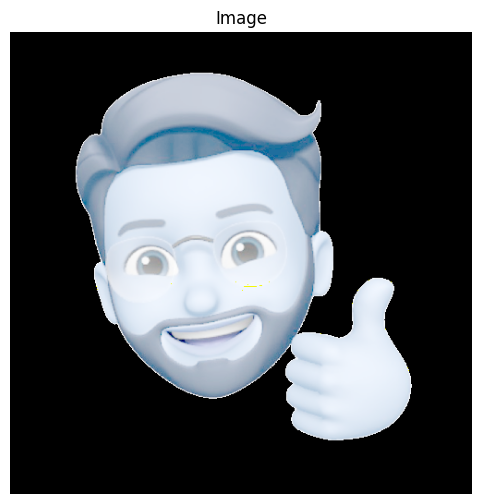

In [27]:
image = cv2.imread("MyMemoji.png")
display_image(log_transformation(image))

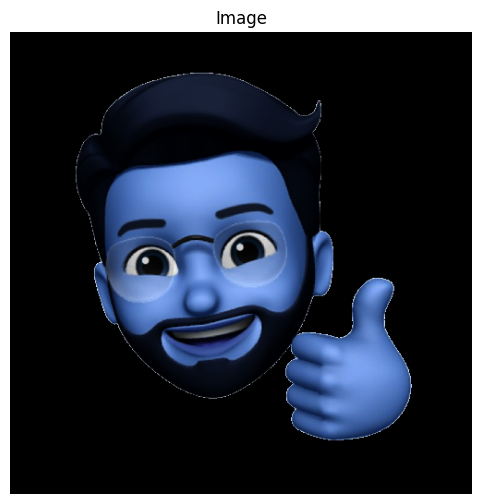

In [28]:
image = cv2.imread("MyMemoji.png")
display_image(power_transformation(image, 2))

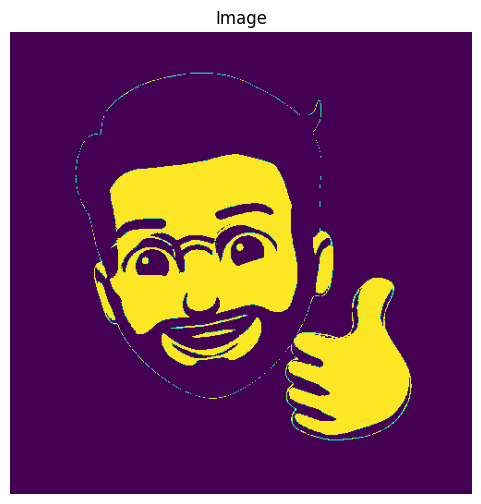

In [29]:
image = cv2.imread("MyMemoji.png")
display_image(grayscale_threshold(image, 150))

# Task 2: Manual Contrast Stretching and Histogram Equalization

## Manual Contrast Stretching

## Histogram Equalization


In [45]:
# Task 2: Manual Contrast Stretching and Histogram Equalization


def manual_contrast_stretching(image, m1, m2):
    # Convert to grayscale for simplicity
    grayscale_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Normalize grayscale image to the range [0, 1]
    normalized_img = grayscale_img / 255.0

    stretched_img = np.zeros_like(normalized_img)

    # Apply stretching below m1
    below_m1 = normalized_img < (m1 / 255.0)
    stretched_img[below_m1] = normalized_img[below_m1] * (m1 / 255.0)

    # Apply stretching between m1 and m2
    between_m1_m2 = (normalized_img >= (m1 / 255.0)) & (normalized_img <= (m2 / 255.0))
    stretched_img[between_m1_m2] = (
        (normalized_img[between_m1_m2] - (m1 / 255.0)) / ((m2 - m1) / 255.0)
    ) * ((m2 - m1) / 255.0) + (m1 / 255.0)

    # Apply stretching above m2
    above_m2 = normalized_img > (m2 / 255.0)
    stretched_img[above_m2] = (
        (normalized_img[above_m2] - (m2 / 255.0)) / ((255 - m2) / 255.0)
    ) * ((255 - m2) / 255.0) + (m2 / 255.0)

    # Scale back to [0, 255]
    stretched_img = stretched_img * 255
    return stretched_img.astype(np.uint8)


def histogram_equalization(image):
    # Convert to grayscale for simplicity
    grayscale_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    global_hist_eq = cv2.equalizeHist(grayscale_img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    local_hist_eq = clahe.apply(grayscale_img)

    return global_hist_eq, local_hist_eq

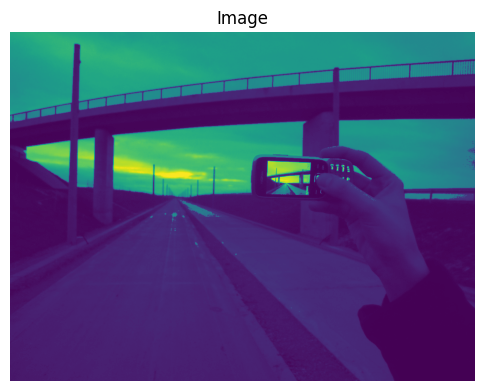

In [46]:
image = cv2.imread("second_image.png")
display_image(manual_contrast_stretching(image, 100, 170))

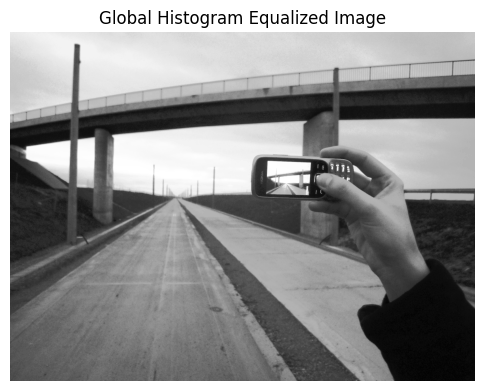

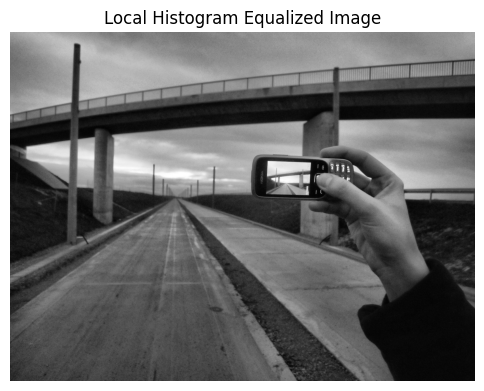

In [47]:
image = cv2.imread("second_image.png")
global_hist_eq, local_hist_eq = histogram_equalization(image)

display_image(global_hist_eq, title="Global Histogram Equalized Image", cmap="gray")

display_image(local_hist_eq, title="Local Histogram Equalized Image", cmap="gray")